<div style="border-radius:15px;
            width:100%;
            background-image: linear-gradient(to bottom right, ##FF007F, #431C53);
            height: 150px">
<div style=" color:#fff;
            height: 400px;
            margin-left:30px;
            padding-top:70px;
            font-size:35px;
            font-weight: bold;">
            BACK END SIDE TWITTER
             
</div>
</div>
   
   

## FETCH DATA FROM TWITTER USING TWITTER API
SOURCE LINK: https://developer.twitter.com/en

In [1]:
import tweepy as tw
api_key = "nZA1UP3eIW9KbRPOAXQZcN7nH"
api_secret = "S0KjwqFMo7RJAtoNBCcDjToHmYXfjXRVsni0VDJpv8fyEo48sf"
auth = tw.OAuthHandler(api_key, api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## TOPIC EXPERIMENT WHAT SENTIMENT

In [2]:
search_query = "russian"

## SET HOW MANY DATA WILL BE COLLECTED

In [3]:
tweet = tw.Cursor(api.search, q=search_query, lang="en", since="2021-01-01").items(100)
tweet_copy = []
for tweet in tweet:
    tweet_copy.append(tweet)    
print("Total Tweets fetched:", len(tweet_copy))

Total Tweets fetched: 100


## DATAFRAME

In [4]:
%%time
import pandas as pd
pd.set_option('display.max_colwidth', 200)
data = pd.DataFrame()
for tweet in tweet_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    data = data.append(pd.DataFrame({'user_name': tweet.user.name, 'date': tweet.created_at,'text': text, 'hashtags': [hashtags if hashtags else None],'source': tweet.source}))
    data = data.reset_index(drop=True)
data.head(7)

Wall time: 1min 7s


,user_name,date,text,hashtags,source
0,Amy,2022-03-05 03:39:12,"RT @nexta_tv: ⚡️Russian Senator Lyudmila Narusova acknowledged huge losses of the #Russian army\n\n""Yesterday the conscripts, who were forced…",[Russian],Twitter for Android
1,Cathy Orcutt,2022-03-05 03:39:12,"RT @lifesafeast: After we remove Russian vodka from liquor stores, cut off Amazon deliveries, freeze banking assets, confiscate property &amp;…",None,Twitter for Android
2,totozilla 🥺🍼🍼🍫,2022-03-05 03:39:11,RT @mjluxmoore: Looks like the whole of Novopskov in eastern Ukraine has come out to tell the bedraggled Russian soldiers occupying the tow…,None,Twitter for Android
3,Alex Costova,2022-03-05 03:39:11,@luisamachado77 @shaunwalker7 Last I spoke with her she fully believed that Ukraine was attacking Russia. I fear if I try to change her mind she could get in trouble. I don't know what to say to h...,None,Twitter for Android
4,Michael👑,2022-03-05 03:39:11,RT @Anansislibrary: They got rid of everything Russian faster than they got rid of all the confederate statues in this country,None,Twitter for iPhone
5,Phillipa Coleman,2022-03-05 03:39:11,RT @GrayConnolly: These people are certifiable.\nTrump lost his account for mean tweets.\nThese guys want the Russian President assassinated.,None,Twitter for iPhone
6,Leslie Ebersole,2022-03-05 03:39:11,@chrislance33 @ericgarland @chrislance33 either you’re you’re a Russian propagandist or you’ve jumped on a Kremlin-funded faux-leftist bandwagon. \n\nhttps://t.co/DspceVmYFA,None,Twitter for iPhone


In [5]:
data.to_csv('datasets/russian.csv') 

<b>DATA INFORMATION

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_name  100 non-null    object        
 1   date       100 non-null    datetime64[ns]
 2   text       100 non-null    object        
 3   hashtags   4 non-null      object        
 4   source     100 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 4.0+ KB


<b>DROP UNNECESSARY COLUMNS

In [7]:
data = data.drop(['date'], axis=1)
data = data.drop(['hashtags'], axis=1)
data = data.drop(['source'], axis=1)

<b>SUMMARY

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_name  100 non-null    object
 1   text       100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


<b>DATA FRAME

In [9]:
data.head(7)

,user_name,text
0,Amy,"RT @nexta_tv: ⚡️Russian Senator Lyudmila Narusova acknowledged huge losses of the #Russian army\n\n""Yesterday the conscripts, who were forced…"
1,Cathy Orcutt,"RT @lifesafeast: After we remove Russian vodka from liquor stores, cut off Amazon deliveries, freeze banking assets, confiscate property &amp;…"
2,totozilla 🥺🍼🍼🍫,RT @mjluxmoore: Looks like the whole of Novopskov in eastern Ukraine has come out to tell the bedraggled Russian soldiers occupying the tow…
3,Alex Costova,@luisamachado77 @shaunwalker7 Last I spoke with her she fully believed that Ukraine was attacking Russia. I fear if I try to change her mind she could get in trouble. I don't know what to say to h...
4,Michael👑,RT @Anansislibrary: They got rid of everything Russian faster than they got rid of all the confederate statues in this country
5,Phillipa Coleman,RT @GrayConnolly: These people are certifiable.\nTrump lost his account for mean tweets.\nThese guys want the Russian President assassinated.
6,Leslie Ebersole,@chrislance33 @ericgarland @chrislance33 either you’re you’re a Russian propagandist or you’ve jumped on a Kremlin-funded faux-leftist bandwagon. \n\nhttps://t.co/DspceVmYFA


## IMPLEMENTATION OF NATURAL LANGUAGE PROCESSING

## 1. DATA CLEANING

<b>BASIC TEXT PREPROCESSING

<b>1.1. SET LOWERCASE</b> Convert all capital letter into lowercase.<br>
<i>Sample: I LOVE COMPUTER SCIENCE --> i love computer science 

In [10]:
data['lowercase'] = data['text'].str.lower()
data[['text', 'lowercase']].head(3)

,text,lowercase
0,"RT @nexta_tv: ⚡️Russian Senator Lyudmila Narusova acknowledged huge losses of the #Russian army\n\n""Yesterday the conscripts, who were forced…","rt @nexta_tv: ⚡️russian senator lyudmila narusova acknowledged huge losses of the #russian army\n\n""yesterday the conscripts, who were forced…"
1,"RT @lifesafeast: After we remove Russian vodka from liquor stores, cut off Amazon deliveries, freeze banking assets, confiscate property &amp;…","rt @lifesafeast: after we remove russian vodka from liquor stores, cut off amazon deliveries, freeze banking assets, confiscate property &amp;…"
2,RT @mjluxmoore: Looks like the whole of Novopskov in eastern Ukraine has come out to tell the bedraggled Russian soldiers occupying the tow…,rt @mjluxmoore: looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow…


In [11]:
data[['text', 'lowercase']].tail(3)

,text,lowercase
97,"RT @BaigHissam: @ZelenskyyUa Once a comedian, always a comedian. You'd learn it the hard way when Russian jets start razing Kiev, Kharkiv a…","rt @baighissam: @zelenskyyua once a comedian, always a comedian. you'd learn it the hard way when russian jets start razing kiev, kharkiv a…"
98,"RT @DavidPriess: 25 years ago, this month:\n\nUS President Bill Clinton and Russian President Boris Yeltsin, at a summit in Helsinki, agreed…","rt @davidpriess: 25 years ago, this month:\n\nus president bill clinton and russian president boris yeltsin, at a summit in helsinki, agreed…"
99,RT @TheInsiderPaper: USD TO RUSSIAN RUBLE - CHART https://t.co/s8BKNR5MLV,rt @theinsiderpaper: usd to russian ruble - chart https://t.co/s8bknr5mlv


<b>1.2. REMOVE UNWANTED SPACES</b> Remove all unwanted spaces from a string.

In [12]:
#sample
import re
re.sub(r'\s+', ' ', 'i love      computer science') 

'i love computer science'

In [13]:
import re
data['unwanted_spaces'] = data['lowercase'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
data[['lowercase', 'unwanted_spaces']].head(3)

,lowercase,unwanted_spaces
0,"rt @nexta_tv: ⚡️russian senator lyudmila narusova acknowledged huge losses of the #russian army\n\n""yesterday the conscripts, who were forced…","rt @nexta_tv: ⚡️russian senator lyudmila narusova acknowledged huge losses of the #russian army ""yesterday the conscripts, who were forced…"
1,"rt @lifesafeast: after we remove russian vodka from liquor stores, cut off amazon deliveries, freeze banking assets, confiscate property &amp;…","rt @lifesafeast: after we remove russian vodka from liquor stores, cut off amazon deliveries, freeze banking assets, confiscate property &amp;…"
2,rt @mjluxmoore: looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow…,rt @mjluxmoore: looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow…


In [14]:
data[['lowercase', 'unwanted_spaces']].tail(3)

,lowercase,unwanted_spaces
97,"rt @baighissam: @zelenskyyua once a comedian, always a comedian. you'd learn it the hard way when russian jets start razing kiev, kharkiv a…","rt @baighissam: @zelenskyyua once a comedian, always a comedian. you'd learn it the hard way when russian jets start razing kiev, kharkiv a…"
98,"rt @davidpriess: 25 years ago, this month:\n\nus president bill clinton and russian president boris yeltsin, at a summit in helsinki, agreed…","rt @davidpriess: 25 years ago, this month: us president bill clinton and russian president boris yeltsin, at a summit in helsinki, agreed…"
99,rt @theinsiderpaper: usd to russian ruble - chart https://t.co/s8bknr5mlv,rt @theinsiderpaper: usd to russian ruble - chart https://t.co/s8bknr5mlv


<b>1.3. REMOVE URLS</b> Remove all URLS path from a string.

In [15]:
#sample
import re
re.sub(r"http\S+|https\S+", "", 'https://earist.edu.ph/ http://earist.edu.ph/ i love computer science', flags = re.MULTILINE) 

'  i love computer science'

In [16]:
import re
data['urls'] = data['unwanted_spaces'].apply(lambda x:re.sub(r"http\S+|https\S+", "", x, flags = re.MULTILINE))
data[['unwanted_spaces', 'urls']].head(3)

,unwanted_spaces,urls
0,"rt @nexta_tv: ⚡️russian senator lyudmila narusova acknowledged huge losses of the #russian army ""yesterday the conscripts, who were forced…","rt @nexta_tv: ⚡️russian senator lyudmila narusova acknowledged huge losses of the #russian army ""yesterday the conscripts, who were forced…"
1,"rt @lifesafeast: after we remove russian vodka from liquor stores, cut off amazon deliveries, freeze banking assets, confiscate property &amp;…","rt @lifesafeast: after we remove russian vodka from liquor stores, cut off amazon deliveries, freeze banking assets, confiscate property &amp;…"
2,rt @mjluxmoore: looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow…,rt @mjluxmoore: looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow…


In [17]:
data[['unwanted_spaces', 'urls']].tail(3)

,unwanted_spaces,urls
97,"rt @baighissam: @zelenskyyua once a comedian, always a comedian. you'd learn it the hard way when russian jets start razing kiev, kharkiv a…","rt @baighissam: @zelenskyyua once a comedian, always a comedian. you'd learn it the hard way when russian jets start razing kiev, kharkiv a…"
98,"rt @davidpriess: 25 years ago, this month: us president bill clinton and russian president boris yeltsin, at a summit in helsinki, agreed…","rt @davidpriess: 25 years ago, this month: us president bill clinton and russian president boris yeltsin, at a summit in helsinki, agreed…"
99,rt @theinsiderpaper: usd to russian ruble - chart https://t.co/s8bknr5mlv,rt @theinsiderpaper: usd to russian ruble - chart


<b>1.4. REMOVE HTML ENCODINGS</b> Remove all HTML tags from a string.

In [18]:
#sample
import re
re.sub('<[^<]+?>', '', '<b> i love computer science </b>') 

' i love computer science '

In [19]:
import re
data['html_encodings'] = data['urls'].apply(lambda x: re.sub('<[^<]+?>', '', x))
data[['urls', 'html_encodings']].head(3)

,urls,html_encodings
0,"rt @nexta_tv: ⚡️russian senator lyudmila narusova acknowledged huge losses of the #russian army ""yesterday the conscripts, who were forced…","rt @nexta_tv: ⚡️russian senator lyudmila narusova acknowledged huge losses of the #russian army ""yesterday the conscripts, who were forced…"
1,"rt @lifesafeast: after we remove russian vodka from liquor stores, cut off amazon deliveries, freeze banking assets, confiscate property &amp;…","rt @lifesafeast: after we remove russian vodka from liquor stores, cut off amazon deliveries, freeze banking assets, confiscate property &amp;…"
2,rt @mjluxmoore: looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow…,rt @mjluxmoore: looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow…


In [20]:
data[['urls', 'html_encodings']].tail(3)

,urls,html_encodings
97,"rt @baighissam: @zelenskyyua once a comedian, always a comedian. you'd learn it the hard way when russian jets start razing kiev, kharkiv a…","rt @baighissam: @zelenskyyua once a comedian, always a comedian. you'd learn it the hard way when russian jets start razing kiev, kharkiv a…"
98,"rt @davidpriess: 25 years ago, this month: us president bill clinton and russian president boris yeltsin, at a summit in helsinki, agreed…","rt @davidpriess: 25 years ago, this month: us president bill clinton and russian president boris yeltsin, at a summit in helsinki, agreed…"
99,rt @theinsiderpaper: usd to russian ruble - chart,rt @theinsiderpaper: usd to russian ruble - chart


<b>1.5. REMOVE USERNAMES</b> Remove all usernames from a string.

In [21]:
#sample
import re
re.sub('@[A-Za-z0-9]+', '', '@juandelacruz i love computer science') 

' i love computer science'

In [22]:
import re
data['usernames'] = data['html_encodings'].apply(lambda x: re.sub('@[A-Za-z0-9]+', '', x))
data[['html_encodings', 'usernames']].head(3)

,html_encodings,usernames
0,"rt @nexta_tv: ⚡️russian senator lyudmila narusova acknowledged huge losses of the #russian army ""yesterday the conscripts, who were forced…","rt _tv: ⚡️russian senator lyudmila narusova acknowledged huge losses of the #russian army ""yesterday the conscripts, who were forced…"
1,"rt @lifesafeast: after we remove russian vodka from liquor stores, cut off amazon deliveries, freeze banking assets, confiscate property &amp;…","rt : after we remove russian vodka from liquor stores, cut off amazon deliveries, freeze banking assets, confiscate property &amp;…"
2,rt @mjluxmoore: looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow…,rt : looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow…


In [23]:
data[['html_encodings', 'usernames']].tail(3)

,html_encodings,usernames
97,"rt @baighissam: @zelenskyyua once a comedian, always a comedian. you'd learn it the hard way when russian jets start razing kiev, kharkiv a…","rt : once a comedian, always a comedian. you'd learn it the hard way when russian jets start razing kiev, kharkiv a…"
98,"rt @davidpriess: 25 years ago, this month: us president bill clinton and russian president boris yeltsin, at a summit in helsinki, agreed…","rt : 25 years ago, this month: us president bill clinton and russian president boris yeltsin, at a summit in helsinki, agreed…"
99,rt @theinsiderpaper: usd to russian ruble - chart,rt : usd to russian ruble - chart


<b>1.6. REMOVE PUNCTUATIONS, NUMBERS, ETC.</b> Remove all punctuations, numbers, etc. from a string.<br>
<i>Sample: i love computer science 100% !!!!!!! --> i love computer science

In [24]:
import re
data['pne'] = data['usernames'].apply(lambda x: re.sub('[^A-Za-z]', ' ', x))
data[['usernames', 'pne']].head(3)

,usernames,pne
0,"rt _tv: ⚡️russian senator lyudmila narusova acknowledged huge losses of the #russian army ""yesterday the conscripts, who were forced…",rt tv russian senator lyudmila narusova acknowledged huge losses of the russian army yesterday the conscripts who were forced
1,"rt : after we remove russian vodka from liquor stores, cut off amazon deliveries, freeze banking assets, confiscate property &amp;…",rt after we remove russian vodka from liquor stores cut off amazon deliveries freeze banking assets confiscate property amp
2,rt : looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow…,rt looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow


In [25]:
data[['usernames', 'pne']].tail(3)

,usernames,pne
97,"rt : once a comedian, always a comedian. you'd learn it the hard way when russian jets start razing kiev, kharkiv a…",rt once a comedian always a comedian you d learn it the hard way when russian jets start razing kiev kharkiv a
98,"rt : 25 years ago, this month: us president bill clinton and russian president boris yeltsin, at a summit in helsinki, agreed…",rt years ago this month us president bill clinton and russian president boris yeltsin at a summit in helsinki agreed
99,rt : usd to russian ruble - chart,rt usd to russian ruble chart


<b>1.7. REMOVE 3 AND LESS CHARACTERS</b> Remove all 3 and less charaters from a string.<br>
<i>Sample: i love computer science --> love computer science

In [26]:
data['three_characters'] = data['pne'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data[['pne', 'three_characters']].head(3)

,pne,three_characters
0,rt tv russian senator lyudmila narusova acknowledged huge losses of the russian army yesterday the conscripts who were forced,russian senator lyudmila narusova acknowledged huge losses russian army yesterday conscripts were forced
1,rt after we remove russian vodka from liquor stores cut off amazon deliveries freeze banking assets confiscate property amp,after remove russian vodka from liquor stores amazon deliveries freeze banking assets confiscate property
2,rt looks like the whole of novopskov in eastern ukraine has come out to tell the bedraggled russian soldiers occupying the tow,looks like whole novopskov eastern ukraine come tell bedraggled russian soldiers occupying


In [27]:
data[['pne', 'three_characters']].tail(3)

,pne,three_characters
97,rt once a comedian always a comedian you d learn it the hard way when russian jets start razing kiev kharkiv a,once comedian always comedian learn hard when russian jets start razing kiev kharkiv
98,rt years ago this month us president bill clinton and russian president boris yeltsin at a summit in helsinki agreed,years this month president bill clinton russian president boris yeltsin summit helsinki agreed
99,rt usd to russian ruble chart,russian ruble chart


<b>INTERMEDIATE TEXT PROPROCESSING

STOPWORDS LANGUAGE SCOPE

In [28]:
from nltk.corpus import stopwords
print(stopwords.fileids())

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


STOPWORDS

In [34]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<b>1.8. REMOVE STOPWORDS</b> Remove all stopwords from a string.

In [35]:
data['stopwords'] = data['three_characters'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data[['three_characters', 'stopwords']].head(3)

,three_characters,stopwords
0,russian senator lyudmila narusova acknowledged huge losses russian army yesterday conscripts were forced,russian senator lyudmila narusova acknowledged huge losses russian army yesterday conscripts forced
1,after remove russian vodka from liquor stores amazon deliveries freeze banking assets confiscate property,remove russian vodka liquor stores amazon deliveries freeze banking assets confiscate property
2,looks like whole novopskov eastern ukraine come tell bedraggled russian soldiers occupying,looks like whole novopskov eastern ukraine come tell bedraggled russian soldiers occupying


In [36]:
data[['three_characters', 'stopwords']].tail(3)

,three_characters,stopwords
97,once comedian always comedian learn hard when russian jets start razing kiev kharkiv,comedian always comedian learn hard russian jets start razing kiev kharkiv
98,years this month president bill clinton russian president boris yeltsin summit helsinki agreed,years month president bill clinton russian president boris yeltsin summit helsinki agreed
99,russian ruble chart,russian ruble chart


<b>1.9. TOKENIZING</b> Process of splitting a string.

In [37]:
from nltk.tokenize import word_tokenize
data['tokenize'] = data['stopwords'].apply(lambda x: word_tokenize(x))
data[['stopwords', 'tokenize']].head(3)

,stopwords,tokenize
0,russian senator lyudmila narusova acknowledged huge losses russian army yesterday conscripts forced,"[russian, senator, lyudmila, narusova, acknowledged, huge, losses, russian, army, yesterday, conscripts, forced]"
1,remove russian vodka liquor stores amazon deliveries freeze banking assets confiscate property,"[remove, russian, vodka, liquor, stores, amazon, deliveries, freeze, banking, assets, confiscate, property]"
2,looks like whole novopskov eastern ukraine come tell bedraggled russian soldiers occupying,"[looks, like, whole, novopskov, eastern, ukraine, come, tell, bedraggled, russian, soldiers, occupying]"


In [39]:
data[['stopwords', 'tokenize']].tail(3)

,stopwords,tokenize
47,fixed picture accuracy princeandrewisnext princewilliamaffair meghanmarklewon,"[fixed, picture, accuracy, princeandrewisnext, princewilliamaffair, meghanmarklewon]"
48,secret know princewilliamaffair allegedly another daughter rose hanbury real messed prin,"[secret, know, princewilliamaffair, allegedly, another, daughter, rose, hanbury, real, messed, prin]"
49,prince andrew another another scandal royal family princeandrew princewilliamaffair princeandrewtrial,"[prince, andrew, another, another, scandal, royal, family, princeandrew, princewilliamaffair, princeandrewtrial]"


<b>1.10. LEMMATIZING</b> Converting a word to its base form.

In [42]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
def def_lemma(tweets):     
    tweet_tokens = word_tokenize(tweets)
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos = 'a') for w in tweet_tokens]  #adjective
    lemma_words = [lemmatizer.lemmatize(w, pos = 'n') for w in lemma_words]   #nouns
    lemma_words = [lemmatizer.lemmatize(w, pos = 'r') for w in lemma_words]   #adverb
    lemma_words = [lemmatizer.lemmatize(w, pos = 'v') for w in lemma_words]   #verb  
    return " ".join(lemma_words)
#sample
def_lemma("walking")

'walk'

In [43]:
data['lemmatize'] = data['stopwords'].apply(lambda x: def_lemma(x))
data[['tokenize', 'lemmatize']].head(3)

,tokenize,lemmatize
0,"[russian, senator, lyudmila, narusova, acknowledged, huge, losses, russian, army, yesterday, conscripts, forced]",russian senator lyudmila narusova acknowledge huge loss russian army yesterday conscript force
1,"[remove, russian, vodka, liquor, stores, amazon, deliveries, freeze, banking, assets, confiscate, property]",remove russian vodka liquor store amazon delivery freeze bank asset confiscate property
2,"[looks, like, whole, novopskov, eastern, ukraine, come, tell, bedraggled, russian, soldiers, occupying]",look like whole novopskov eastern ukraine come tell bedraggle russian soldier occupy


In [44]:
data[['tokenize', 'lemmatize']].tail(3)

,tokenize,lemmatize
97,"[comedian, always, comedian, learn, hard, russian, jets, start, razing, kiev, kharkiv]",comedian always comedian learn hard russian jet start raze kiev kharkiv
98,"[years, month, president, bill, clinton, russian, president, boris, yeltsin, summit, helsinki, agreed]",year month president bill clinton russian president boris yeltsin summit helsinki agree
99,"[russian, ruble, chart]",russian ruble chart


<b>1.11. REMOVE DUPLICATE</b> Remove all duplicate words from a string.

In [45]:
from collections import OrderedDict
data['duplicate'] = (data['lemmatize'].str.split().apply(lambda x: OrderedDict.fromkeys(x).keys()).str.join(' '))
data[['lemmatize', 'duplicate']].head(3)

,lemmatize,duplicate
0,russian senator lyudmila narusova acknowledge huge loss russian army yesterday conscript force,russian senator lyudmila narusova acknowledge huge loss army yesterday conscript force
1,remove russian vodka liquor store amazon delivery freeze bank asset confiscate property,remove russian vodka liquor store amazon delivery freeze bank asset confiscate property
2,look like whole novopskov eastern ukraine come tell bedraggle russian soldier occupy,look like whole novopskov eastern ukraine come tell bedraggle russian soldier occupy


In [46]:
data[['lemmatize', 'duplicate']].tail(3)

,lemmatize,duplicate
97,comedian always comedian learn hard russian jet start raze kiev kharkiv,comedian always learn hard russian jet start raze kiev kharkiv
98,year month president bill clinton russian president boris yeltsin summit helsinki agree,year month president bill clinton russian boris yeltsin summit helsinki agree
99,russian ruble chart,russian ruble chart


RENAMING

In [47]:
data['clean_text'] = data['duplicate']

SAVE TO CSV FILE

In [48]:
data.to_csv('Datasets/russian_clean.csv') 

## 2. EXPLORATORY DATA ANALYSIS

<b>READ DATA USING PANDAS

In [51]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
dc_df = pd.read_csv('Datasets/russian_clean.csv')

<b>DATA INFORMATION

In [52]:
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        100 non-null    int64 
 1   user_name         100 non-null    object
 2   text              100 non-null    object
 3   lowercase         100 non-null    object
 4   unwanted_spaces   100 non-null    object
 5   urls              100 non-null    object
 6   html_encodings    100 non-null    object
 7   usernames         100 non-null    object
 8   pne               100 non-null    object
 9   three_characters  100 non-null    object
 10  stopwords         100 non-null    object
 11  tokenize          100 non-null    object
 12  lemmatize         100 non-null    object
 13  duplicate         100 non-null    object
 14  clean_text        100 non-null    object
dtypes: int64(1), object(14)
memory usage: 11.8+ KB


<b>DROP UNNECESSARY COLUMNS

In [53]:
dc_df = dc_df.drop(['lowercase'], axis=1)
dc_df = dc_df.drop(['unwanted_spaces'], axis=1)
dc_df = dc_df.drop(['urls'], axis=1)
dc_df = dc_df.drop(['html_encodings'], axis=1)
dc_df = dc_df.drop(['usernames'], axis=1)
dc_df = dc_df.drop(['pne'], axis=1)
dc_df = dc_df.drop(['three_characters'], axis=1)
dc_df = dc_df.drop(['stopwords'], axis=1)
dc_df = dc_df.drop(['tokenize'], axis=1)
dc_df = dc_df.drop(['lemmatize'], axis=1)
dc_df = dc_df.drop(['duplicate'], axis=1)

In [54]:
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   user_name   100 non-null    object
 2   text        100 non-null    object
 3   clean_text  100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


<b>HOW LONG ARE THE TWEETS?

<b>LENGTH: TEXT VS CLEAN TEXT

In [55]:
dc_df['tx_len'] = dc_df.text.apply(len)
dc_df['dc_len'] = dc_df.clean_text.apply(len)
dc_df[['tx_len','dc_len']].head(7)

,tx_len,dc_len
0,140,86
1,143,87
2,140,84
3,309,132
4,126,50
5,139,87
6,171,68


<b>PLOT

<AxesSubplot:>

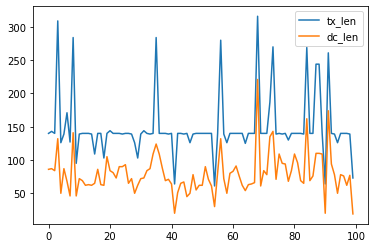

In [56]:
dc_df['tx_len'] = dc_df.text.apply(len)
dc_df['dc_len'] = dc_df.clean_text.apply(len)
dc_df[['tx_len','dc_len']].plot()

<b>NUMBER OF WORD

In [57]:
dc_df['Num_words_ST'] = dc_df['clean_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
dc_df['Num_word_text'] = dc_df['text'].apply(lambda x:len(str(x).split())) #Number Of words

## SENTIMENT ANALYSIS

<b>VADER:</b> PERCENTAGE OF NEGATIVE = neg, NEUTRAL = neu, POSITIVE = pos AND COMPOUND

In [74]:
from  nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
def sentiment_analysis(s):
    print("'{}'\n---------------------\n{}".format(s,sid.polarity_scores(s)))    
sentiment_analysis('the covid pandemic is really horrifying')

'the covid pandemic is really horrifying'
---------------------
{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.6115}


<b>TEXBLOB:</b> PERCENTAGE OF SUBJECTIVITY AND OBJECTIVITY

In [75]:
from textblob import TextBlob
tblob1 = TextBlob("the covid pandemic is really horrifying")
tblob1.sentiment

Sentiment(polarity=-0.9, subjectivity=1.0)

In [76]:
tblob2 = TextBlob("implement of NLP and Machine Learning")
tblob2.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

<b> APPLYING VADER TO DATA FRAME

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
dc_df['compound'] = [analyzer.polarity_scores(v)['compound']*100 for v in dc_df['clean_text']]
dc_df['neg'] = [analyzer.polarity_scores(v)['neg']*100 for v in dc_df['clean_text']]
dc_df['neu'] = [analyzer.polarity_scores(v)['neu']*100 for v in dc_df['clean_text']]
dc_df['pos'] = [analyzer.polarity_scores(v)['pos']*100 for v in dc_df['clean_text']]
dc_df[['clean_text', 'neg', 'neu', 'pos', 'compound']].round(2).head(7)

,clean_text,neg,neu,pos,compound
0,russian senator lyudmila narusova acknowledge huge loss army yesterday conscript force,16.9,66.2,16.9,0.00
1,remove russian vodka liquor store amazon delivery freeze bank asset confiscate property,0.0,62.5,37.5,52.67
2,look like whole novopskov eastern ukraine come tell bedraggle russian soldier occupy,0.0,81.5,18.5,36.12
3,last speak fully believe ukraine attack russia fear change mind could trouble know hope safe love feel helpless russian live america,33.8,38.6,27.6,-31.02
4,everything russian fast confederate statue country,0.0,100.0,0.0,0.00
5,people certifiable trump lose account mean tweet guy want russian president assassinate,19.3,71.4,9.3,-34.00
6,either russian propagandist jump kremlin fund faux leftist bandwagon,0.0,100.0,0.0,0.00


<b>SENTIMENT LABELED

In [59]:
def Analysis(score): 
    if score >= 0.05:
        return 1
    elif score <= -0.05:
        return 0
    else:
        return 2
dc_df["st"] = dc_df["compound"].apply(Analysis)
dc_df[['clean_text', 'st']].head(7)

,clean_text,st
0,russian senator lyudmila narusova acknowledge huge loss army yesterday conscript force,2
1,remove russian vodka liquor store amazon delivery freeze bank asset confiscate property,1
2,look like whole novopskov eastern ukraine come tell bedraggle russian soldier occupy,1
3,last speak fully believe ukraine attack russia fear change mind could trouble know hope safe love feel helpless russian live america,0
4,everything russian fast confederate statue country,2
5,people certifiable trump lose account mean tweet guy want russian president assassinate,0
6,either russian propagandist jump kremlin fund faux leftist bandwagon,2


<b>COUNT SENTIMENT VALLUE

In [60]:
# 1 positive
# 0 negative
# 2 neutral
dc_df['st'].value_counts()

1    36
0    34
2    30
Name: st, dtype: int64

<AxesSubplot:xlabel='st', ylabel='count'>

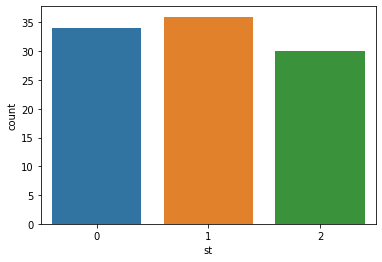

In [61]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(dc_df.st)

## BY WORDS

<b>MOST FREQUENTLY WORDS

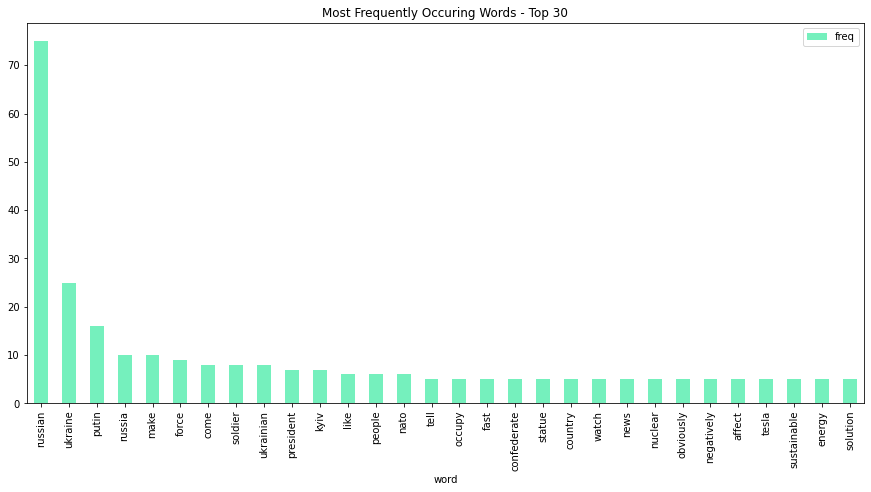

In [62]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
cbs = '#75f0bd'
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dc_df.clean_text)
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = cbs)
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()

In [64]:
words_df = pd.DataFrame(frequency)

<b>APPLYING VADER

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
words_df['compound'] = [analyzer.polarity_scores(v)['compound']*100 for v in words_df['word']]
words_df['neg'] = [analyzer.polarity_scores(v)['neg']*100 for v in words_df['word']]
words_df['neu'] = [analyzer.polarity_scores(v)['neu']*100 for v in words_df['word']]
words_df['pos'] = [analyzer.polarity_scores(v)['pos']*100 for v in words_df['word']]
words_df[['word', 'neg', 'neu', 'pos', 'compound']].round(2).head(7)

,word,neg,neu,pos,compound
0,russian,0.0,100.0,0.0,0.0
1,ukraine,0.0,100.0,0.0,0.0
2,putin,0.0,100.0,0.0,0.0
3,russia,0.0,100.0,0.0,0.0
4,make,0.0,100.0,0.0,0.0
5,force,0.0,100.0,0.0,0.0
6,come,0.0,100.0,0.0,0.0


<b>SENTIMENT LABELED

In [66]:
def Analysis(score): 
    if score >= 0.05:
        return 1
    elif score <= -0.05:
        return 0
    else:
        return 2
words_df["st"] = words_df["compound"].apply(Analysis)
words_df[['word', 'st']].head(7)

,word,st
0,russian,2
1,ukraine,2
2,putin,2
3,russia,2
4,make,2
5,force,2
6,come,2


<b>COUNT SENTIMENT VALUE

In [67]:
# 1 positive
# 0 negative
# 2 neutral
words_df['st'].value_counts()

2    464
0     52
1     52
Name: st, dtype: int64

<AxesSubplot:xlabel='st', ylabel='count'>

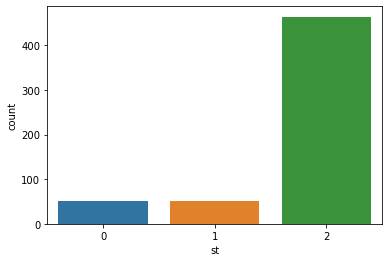

In [68]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(words_df.st)

<b>FIRST 10 LARGEST POSITIVE VALUES

In [69]:
words_df[['word', 'pos', 'compound']].nlargest(10, ['pos']).reset_index(drop=True)

,word,pos,compound
0,like,100.0,36.12
1,energy,100.0,27.32
2,solution,100.0,31.82
3,love,100.0,63.69
4,innocent,100.0,34.00
5,clear,100.0,38.18
6,astound,100.0,40.19
7,peace,100.0,54.23
8,friend,100.0,49.39
9,defense,100.0,12.80


<b>FIRST 10 LARGEST NEGATIVE VALUES

In [70]:
words_df[['word', 'neg', 'compound']].nlargest(10, ['neg']).reset_index(drop=True)

,word,neg,compound
0,attack,100.0,-47.67
1,defeatism,100.0,-31.82
2,kill,100.0,-69.08
3,death,100.0,-59.94
4,loss,100.0,-31.82
5,lose,100.0,-40.19
6,criticize,100.0,-38.18
7,fight,100.0,-38.18
8,fascist,100.0,-55.74
9,leave,100.0,-5.16


## WORDCLOUD POSTIVE

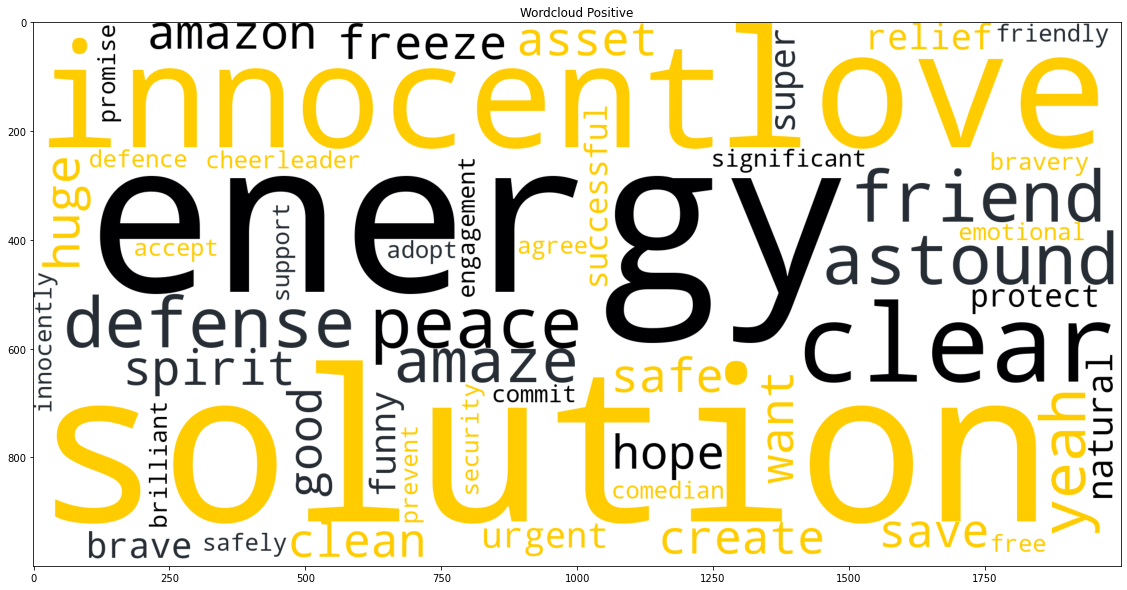

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from matplotlib import colors
color_list=['#262D35','#ffcc00','#000002',]
colormap=colors.ListedColormap(color_list)
words = ' '.join([Text for Text in words_df[words_df['st']==1]['word']])
wordCloud = WordCloud(background_color='white',colormap=colormap, mode="RGB", width=2000 , height=1000).generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Wordcloud Positive")
plt.show()

## WORDCLOUD NEGATIVE

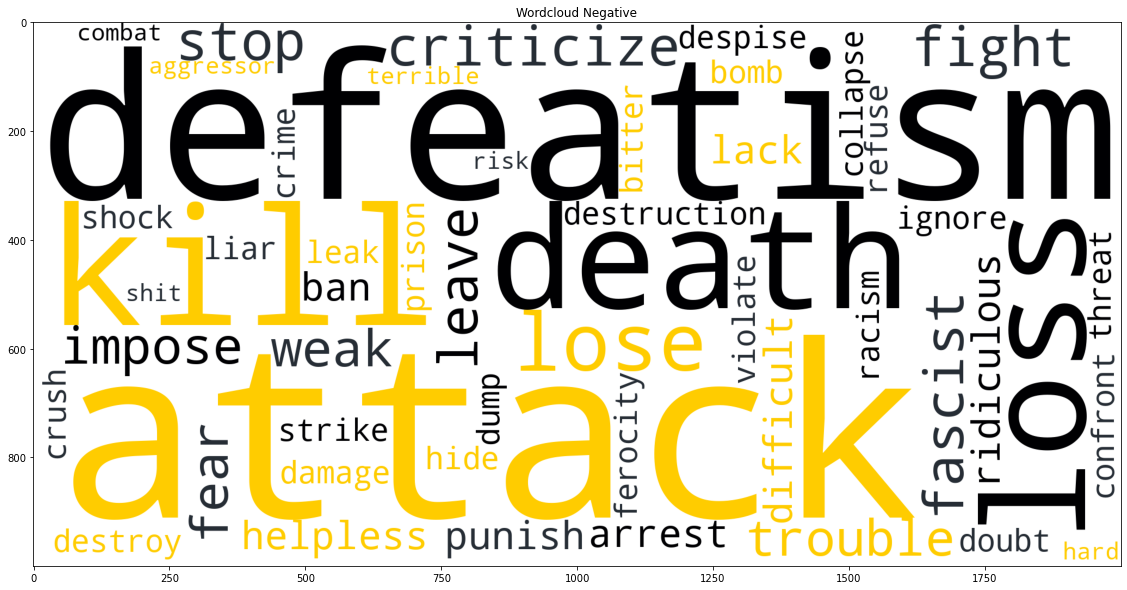

In [72]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from matplotlib import colors
from nltk.corpus import stopwords
color_list=['#262D35','#ffcc00','#000002',]
colormap=colors.ListedColormap(color_list)
words = ' '.join([Text for Text in words_df[words_df['st']==0]['word']])
wordCloud = WordCloud(background_color='white',colormap=colormap, mode="RGB", width=2000 , height=1000).generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Wordcloud Negative")
plt.show()

<b>TEXTBLOB

In [73]:
from textblob import TextBlob
def get_sub(Tweets):
    return TextBlob(Tweets).sentiment.subjectivity
def get_pol(Tweets):
    return TextBlob(Tweets).sentiment.polarity
words_df['subjectivity'] = words_df['word'].apply(get_sub)
words_df['polarity'] = words_df['word'].apply(get_pol)
words_df[['word', 'subjectivity', 'polarity']].head(7)

,word,subjectivity,polarity
0,russian,0.0,0.0
1,ukraine,0.0,0.0
2,putin,0.0,0.0
3,russia,0.0,0.0
4,make,0.0,0.0
5,force,0.0,0.0
6,come,0.0,0.0


<b>SUBJECTTIVITY AND POLARITY

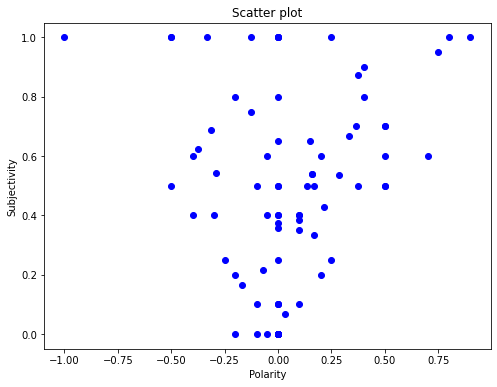

In [74]:
import matplotlib.pyplot as plt
cbs = 'Blue'
import numpy
plt.figure(figsize=(8,6))
for i in range(0, words_df.shape[0]):
    plt.scatter(words_df['polarity'][i], words_df['subjectivity'][i], color=cbs)   
plt.title('Scatter plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

SAVE TO CSV FILE

In [142]:
#words_df.to_csv('datasets/final_words_sentiment_dataset.csv') #words

In [143]:
#dc_df.to_csv('datasets/final_sentiment_dataset.csv') #data

## IMPLEMENTATION OF MACHINE LEARNING

THE RESEARCHER COLLECT DATASET<br><br>
CYBERTHREAT<br>
SOURCE LINK: https://github.com/ndionysus<br>
SOURCE LINK: https://github.com/Samreeneducation<br><br>
CYBERBULLY<br>
SOURCE LINK: https://github.com/Aayush452-cell


<b>DATA FRAME DIMENSION

<b>DATASET

In [79]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
dataset = pd.read_csv('dataset.csv')
dataset.head()

,text,labeled,sentiment
0,b'honesty where the fuck is the adeputs mechanicus page i typed machine god in search and some crap that has nothing to do with warhammer turned up honesty what the fuck whoever is killing warhamm...,cyberthreat,0
1,b'hello you turd fir\xc5\x9bt i a\xe1\xb9\x83 \xc4\xa3oin\xc4\xa3 \xc5\xa3o \xc5\xa3ie \xc5\xb7ou u\xe1\xb9\x97 and kee\xe1\xb9\x97 \xc5\xb7ou \xc3\xa7on\xc5\x9b\xc3\xa7iou\xc5\x9b durin\xc4\xa3 \...,not cybercrime,1
2,b'this man should be shot for war crimes and murder',cyberthreat,0
3,b'graeme bartlet must die',cyberthreat,0
4,b'bigger bang tour memorable moments why did you remove the memorable moments from the bigger bang tour page you wanker thats vandalism fuck off and die fuckwit',cyberthreat,0


In [80]:
dataset.shape

(48952, 3)

In [81]:
dataset.tail()

,text,labeled,sentiment
48947,I dont. But what is complaining about it going to do?,not cybercrime,1
48948,Bahah yeah i&;m totally just gonna&; get pissed at you for talking to you. Mhm thats just how i am! ;D r Ha noooot so muchh.,cyberbully,0
48949,hahahahaha >:) im evil mwahahahahahahahahaha,cyberbully,0
48950,What&;s something unique about Ohio? :),cyberbully,0
48951,Who is the biggest gossiper you know?,cyberbully,0


<b>CYBERCRIME LABELED

In [82]:
temp = dataset.groupby('labeled').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,labeled,text
2,not cybercrime,17862
1,cyberthreat,16719
0,cyberbully,14371


### DATA PREPROCESSING

In [83]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
def preprocess(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    tweet = re.sub(r"http\S+|https\S+", "", tweet, flags = re.MULTILINE)
    tweet = BeautifulSoup(tweet, 'lxml').get_text()
    tweet = re.sub('@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub("[^a-zA-Z]", ' ', tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos = 'a') for w in filtered_words] #adjective
    lemma_words = [lemmatizer.lemmatize(w, pos = 'n') for w in lemma_words]  #nouns
    lemma_words = [lemmatizer.lemmatize(w, pos = 'r') for w in lemma_words]  #adverb
    lemma_words = [lemmatizer.lemmatize(w, pos = 'v') for w in lemma_words]  #verb  
    return " ".join(lemma_words)

In [84]:
from collections import OrderedDict
dataset['pr'] = dataset['text'].apply(lambda x: preprocess(x))
dataset['two'] = dataset['pr'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
dataset['dc'] = (dataset['two'].str.split().apply(lambda x: OrderedDict.fromkeys(x).keys()).str.join(' '))
dataset[['text', 'dc']].head()

,text,dc
0,b'honesty where the fuck is the adeputs mechanicus page i typed machine god in search and some crap that has nothing to do with warhammer turned up honesty what the fuck whoever is killing warhamm...,honesty fuck adeputs mechanicus page type machine search crap nothing warhammer turn whoever kill wikipedia need fire like join well deal
1,b'hello you turd fir\xc5\x9bt i a\xe1\xb9\x83 \xc4\xa3oin\xc4\xa3 \xc5\xa3o \xc5\xa3ie \xc5\xb7ou u\xe1\xb9\x97 and kee\xe1\xb9\x97 \xc5\xb7ou \xc3\xa7on\xc5\x9b\xc3\xa7iou\xc5\x9b durin\xc4\xa3 \...,hello turd durin follo hrough onia bkin love hand olon urba bhove hroa finally body belon
2,b'this man should be shot for war crimes and murder',shoot crime murder
3,b'graeme bartlet must die',graeme bartlet must
4,b'bigger bang tour memorable moments why did you remove the memorable moments from the bigger bang tour page you wanker thats vandalism fuck off and die fuckwit',bang tour memorable moment remove page wanker thats vandalism fuck fuckwit


In [85]:
dataset[['text', 'dc']].tail()

,text,dc
48947,I dont. But what is complaining about it going to do?,dont complain
48948,Bahah yeah i&;m totally just gonna&; get pissed at you for talking to you. Mhm thats just how i am! ;D r Ha noooot so muchh.,bahah yeah totally piss talk thats noooot muchh
48949,hahahahaha >:) im evil mwahahahahahahahahaha,hahahahaha evil mwahahahahahahahahaha
48950,What&;s something unique about Ohio? :),something unique ohio
48951,Who is the biggest gossiper you know?,gossiper know


In [86]:
dataset['ct'] = dataset['dc']

In [87]:
import numpy as np 
import pandas as pd 
import os
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['ct'][i])
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)
bow_transformer = CountVectorizer(stop_words='english')
bow_transformer = bow_transformer.fit(corpus)
print('Length of the Vocabulary: ',len(bow_transformer.vocabulary_))
messages_bow = bow_transformer.transform(corpus)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
X = tfidf_transformer.transform(messages_bow)
y = []
for row in dataset["labeled"]:
    y.append(row)

Length of the Vocabulary:  19873


In [88]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=bow_transformer.get_feature_names(),columns=["idf_weights"])
df_idf.head(7)

,idf_weights
aaaaaanndgummy,11.105469
aaaagh,11.105469
aaaawwwww,11.105469
aaahhhh,11.105469
aaand,10.412322
aaanyyywhoooooooo,11.105469
aaargh,10.700004


In [89]:
df_idf.tail()

,idf_weights
zyxel,10.412322
zziplib,9.852706
zzzz,10.412322
zzzzzz,11.105469
zzzzzzzz,10.412322


SAVE TO CSV FILE

In [163]:
#df_idf.to_csv('datasets/df_idf_dataset.csv') 

## SETTING TRAIN AND TEST SIZE

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

## MODEL SELECTION

<b>NAIVE BAYES

Naive Bayes Results:
                precision    recall  f1-score   support

    cyberbully       0.82      0.86      0.84      3603
   cyberthreat       0.86      0.87      0.86      4191
not cybercrime       0.78      0.74      0.76      4444

      accuracy                           0.82     12238
     macro avg       0.82      0.82      0.82     12238
  weighted avg       0.82      0.82      0.82     12238


Confusion Matrix
 [[3104   35  464]
 [  91 3645  455]
 [ 612  560 3272]]
Multinomial Naive Bayes model accuracy(in %): 82.0
Wall time: 723 ms


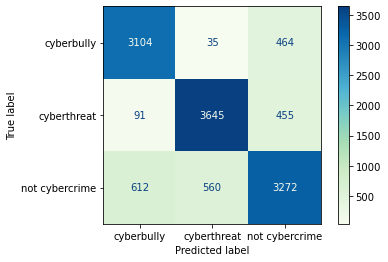

In [95]:
%%time
from sklearn.naive_bayes  import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred_classifier = classifier.predict(X_test)

print('Naive Bayes Results:')
print(classification_report(y_test, y_pred_classifier))
confusion_matrix = confusion_matrix(y_test,y_pred_classifier)
print("\nConfusion Matrix\n", confusion_matrix)

plot_confusion_matrix(classifier, X_test, y_test,cmap="GnBu");

print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_classifier).round(2)*100)

<b>DECISION TREE

Decision Tree Results:
                precision    recall  f1-score   support

    cyberbully       0.91      0.92      0.91      3603
   cyberthreat       0.90      0.92      0.91      4191
not cybercrime       0.90      0.87      0.89      4444

      accuracy                           0.90     12238
     macro avg       0.90      0.91      0.91     12238
  weighted avg       0.90      0.90      0.90     12238


Confusion Matrix
 [[3330   68  205]
 [ 123 3860  208]
 [ 225  341 3878]]
Decision Tree Classifier model accuracy(in %): 90.0
Wall time: 9.08 s


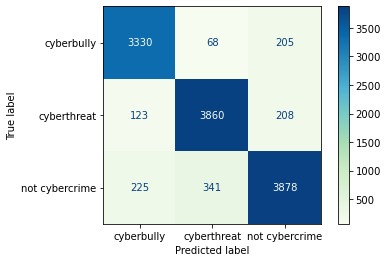

In [96]:
%%time
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print('Decision Tree Results:')
print(classification_report(y_test, y_pred_tree))
confusion_matrix = confusion_matrix(y_test,y_pred_tree)
print("\nConfusion Matrix\n", confusion_matrix)

plot_confusion_matrix(tree, X_test, y_test,cmap="GnBu");

print("Decision Tree Classifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_tree).round(2)*100)

<b>RANDOM FOREST

Random Forest Results:
                precision    recall  f1-score   support

    cyberbully       0.90      0.96      0.93      3603
   cyberthreat       0.91      0.94      0.92      4191
not cybercrime       0.94      0.86      0.90      4444

      accuracy                           0.92     12238
     macro avg       0.92      0.92      0.92     12238
  weighted avg       0.92      0.92      0.92     12238


Confusion Matrix
 [[3452   25  126]
 [ 146 3933  112]
 [ 242  370 3832]]
Random Forest Classifier model accuracy(in %): 92.0
Wall time: 2min 39s


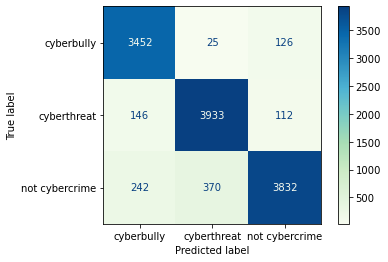

In [97]:
%%time
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print('Random Forest Results:')
print(classification_report(y_test, y_pred_forest))
confusion_matrix = confusion_matrix(y_test,y_pred_forest)
print("\nConfusion Matrix\n", confusion_matrix)

plot_confusion_matrix(forest, X_test, y_test,cmap="GnBu");

print("Random Forest Classifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_forest).round(2)*100)

<b>LOGISTIC REGRESSION

Logistic Regression Results:
                precision    recall  f1-score   support

    cyberbully       0.89      0.96      0.92      3603
   cyberthreat       0.94      0.94      0.94      4191
not cybercrime       0.95      0.89      0.92      4444

      accuracy                           0.93     12238
     macro avg       0.93      0.93      0.93     12238
  weighted avg       0.93      0.93      0.93     12238


Confusion Matrix
 [[3445   34  124]
 [ 155 3935  101]
 [ 262  216 3966]]
Logistic Regression model accuracy(in %): 93.0
Wall time: 5.52 s


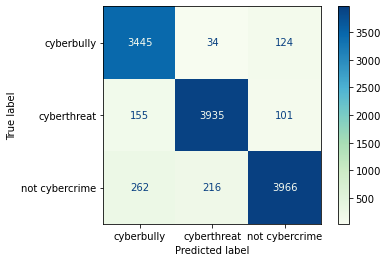

In [98]:
%%time
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Logistic Regression Results:')
print(classification_report(y_test, y_pred_lr))
confusion_matrix = confusion_matrix(y_test,y_pred_lr)
print("\nConfusion Matrix\n", confusion_matrix)

plot_confusion_matrix(lr, X_test, y_test,cmap="GnBu");

print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_lr).round(2)*100)

<b>SUPPORT VECTOR MACHINE

Support Vector Machine Results:
                precision    recall  f1-score   support

    cyberbully       0.91      0.96      0.94      3603
   cyberthreat       0.95      0.95      0.95      4191
not cybercrime       0.95      0.92      0.93      4444

      accuracy                           0.94     12238
     macro avg       0.94      0.94      0.94     12238
  weighted avg       0.94      0.94      0.94     12238


Confusion Matrix
 [[3463   29  111]
 [ 130 3967   94]
 [ 204  166 4074]]
Support Vector Machine model accuracy(in %): 94.0
Wall time: 5min 12s


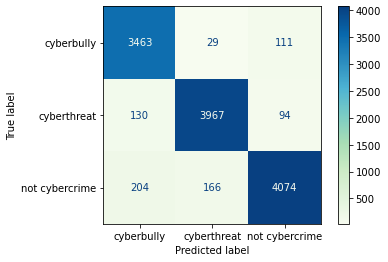

In [99]:
%%time
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print('Support Vector Machine Results:')
print(classification_report(y_test, y_pred_svm))
confusion_matrix = confusion_matrix(y_test,y_pred_svm)
print("\nConfusion Matrix\n", confusion_matrix)

plot_confusion_matrix(svm, X_test, y_test,cmap="GnBu");

print("Support Vector Machine model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_svm).round(2)*100)

<b>K-NEAREST NEIGHBOR

K-Nearest Neighbor Results:
                precision    recall  f1-score   support

    cyberbully       0.46      0.98      0.62      3603
   cyberthreat       0.92      0.55      0.69      4191
not cybercrime       0.93      0.43      0.59      4444

      accuracy                           0.63     12238
     macro avg       0.77      0.65      0.63     12238
  weighted avg       0.79      0.63      0.63     12238


Confusion Matrix
 [[3527   12   64]
 [1823 2290   78]
 [2340  192 1912]]
K-Neighbors Classifier model accuracy(in %): 63.0
Wall time: 28.3 s


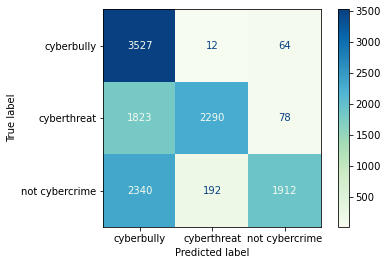

In [100]:
%%time
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('K-Nearest Neighbor Results:')
print(classification_report(y_test, y_pred_knn))
confusion_matrix = confusion_matrix(y_test,y_pred_knn)
print("\nConfusion Matrix\n", confusion_matrix)

plot_confusion_matrix(knn, X_test, y_test,cmap="GnBu");

print("K-Neighbors Classifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_knn).round(2)*100)

## TESTING

<b>NAIVE BAYES

In [134]:
test_set = ['ill k!ll you']
new_test = bow_transformer.transform(test_set)

classifier.predict(new_test)

array(['not cybercrime'], dtype='<U14')

<b>DECISION TREE

In [102]:
test_set = ['He warns that if he is found guilty, he will kill anyone who catches him.']
new_test = bow_transformer.transform(test_set)

tree.predict(new_test)

array(['cyberbully'], dtype='<U14')

<b>RANDOM FOREST

In [103]:
test_set = ['He warns that if he is found guilty, he will kill anyone who catches him.']
new_test = bow_transformer.transform(test_set)

forest.predict(new_test)

array(['cyberbully'], dtype='<U14')

<b>LOGISTIC REGRESSION

In [104]:
test_set = ['He warns that if he is found guilty, he will kill anyone who catches him.']
new_test = bow_transformer.transform(test_set)

lr.predict(new_test)

array(['cyberthreat'], dtype='<U14')

<b>SUPPORT VECTOR MACHINE

In [105]:
test_set = ['He warns that if he is found guilty, he will kill anyone who catches him.']
new_test = bow_transformer.transform(test_set)

svm.predict(new_test)

array(['cyberbully'], dtype='<U14')

<b>K-NEAREST NEIGHBORS

In [106]:
test_set = ['He warns that if he is found guilty, he will kill anyone who catches him.']
new_test = bow_transformer.transform(test_set)

knn.predict(new_test)

array(['cyberbully'], dtype='<U14')

## TEST TO TWITTER

In [115]:
data[['user_name','text']]

,user_name,text
0,Amy,"RT @nexta_tv: ⚡️Russian Senator Lyudmila Narusova acknowledged huge losses of the #Russian army\n\n""Yesterday the conscripts, who were forced…"
1,Cathy Orcutt,"RT @lifesafeast: After we remove Russian vodka from liquor stores, cut off Amazon deliveries, freeze banking assets, confiscate property &amp;…"
2,totozilla 🥺🍼🍼🍫,RT @mjluxmoore: Looks like the whole of Novopskov in eastern Ukraine has come out to tell the bedraggled Russian soldiers occupying the tow…
3,Alex Costova,@luisamachado77 @shaunwalker7 Last I spoke with her she fully believed that Ukraine was attacking Russia. I fear if I try to change her mind she could get in trouble. I don't know what to say to h...
4,Michael👑,RT @Anansislibrary: They got rid of everything Russian faster than they got rid of all the confederate statues in this country
...,...,...
95,John G Mandziuk,RT @MavkaSlavka: Putin is trucking in more fascists to support his flailing Russian army. Wagner troops from Syria will soon be in Ukraine.…
96,Daniel,RT @GicAriana: “NATO cannot risk a combat op against Russian air defence forces bc Putin will go nuclear” is a pile of horse shit.\n\n“But nu…
97,Abdullah,"RT @BaigHissam: @ZelenskyyUa Once a comedian, always a comedian. You'd learn it the hard way when Russian jets start razing Kiev, Kharkiv a…"
98,⚖️ Stellaa,"RT @DavidPriess: 25 years ago, this month:\n\nUS President Bill Clinton and Russian President Boris Yeltsin, at a summit in Helsinki, agreed…"


<b>SELECTING ROW

In [125]:
input_text = data['clean_text'].iloc[99]
input_text

'russian ruble chart'

<b>NAIVE BAYES

In [128]:
test_set = [input_text]
new_test = bow_transformer.transform(test_set)
classifier.predict(new_test)

array(['cyberthreat'], dtype='<U14')

<b>DECISION TREE

In [129]:
test_set = [input_text]
new_test = bow_transformer.transform(test_set)
tree.predict(new_test)

array(['cyberbully'], dtype='<U14')

<b>RANDOM FOREST

In [130]:
test_set = [input_text]
new_test = bow_transformer.transform(test_set)
forest.predict(new_test)

array(['cyberbully'], dtype='<U14')

<b>LOGISTIC REGRESSION

In [131]:
test_set = [input_text]
new_test = bow_transformer.transform(test_set)
lr.predict(new_test)

array(['cyberthreat'], dtype='<U14')

<b>SUPPORT VECTOR MACHINE

In [132]:
test_set = [input_text]
new_test = bow_transformer.transform(test_set)
svm.predict(new_test)

array(['not cybercrime'], dtype='<U14')

<b>K-NEAREST NEIGHBORS

In [133]:
test_set = [input_text]
new_test = bow_transformer.transform(test_set)
knn.predict(new_test)

array(['cyberthreat'], dtype='<U14')